In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.set_option('min_rows', 1000)

In [10]:
profit_df_2021 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\profit\AmazonProfit2021JanMay.xlsx').drop_duplicates()

profit_df_april = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\2021_04_AmazonProfit for Analyst April.xlsx').drop_duplicates()
profit_df_april.columns = ['order id w/o doubles', 'Gross Profit']

profit_df_june = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\2021_06_AmazonProfit for Analytic.xlsx').drop_duplicates()
profit_df_june.columns = ['order id w/o doubles', 'Gross Profit']

frames = [profit_df_2021, profit_df_april, profit_df_june]

profit_df = pd.concat(frames)

In [13]:
Jan_Feb_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\Az.xlsx')
April_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\April.xlsx')
May_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\May.xlsx')
June_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\June.xlsx')

In [14]:
frames = [April_df, May_df, June_df, Jan_Feb_df]

sales_df = pd.concat(frames)

In [15]:
sales_df = sales_df[(sales_df["order-status"] != 'Cancelled') & (sales_df["fulfillment-channel"] != 'Amazon')]
sales_df = sales_df[["asin", "amazon-order-id","ship-state","sku","item-price", "purchase-date"]]

In [16]:
date1 = "2020-12-31"
date2 = "2021-07-01"

In [17]:
sales_df = sales_df[(sales_df['purchase-date'] > date1) & (sales_df['purchase-date'] < date2)]

In [18]:
z = pd.merge(sales_df, profit_df, left_on=["amazon-order-id"], right_on=['order id w/o doubles'], how='inner').drop_duplicates()

In [19]:
category_listing_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Category Listing_full_table.csv')
category_listing_df = category_listing_df[["Product Type", "Product ID"]]

c:\users\mykola\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (1,2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,

In [20]:
a = pd.merge(z, category_listing_df, left_on=["asin"], right_on=['Product ID'], how='left').drop_duplicates()

In [21]:
amazon_inventory_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\AmazonInventory_full_table.csv')

conditions = [
    (amazon_inventory_df[["ct_map_price"]] > 0),
    (amazon_inventory_df[["ct_map_price"]] < 0),
]

choices = [True, False]
amazon_inventory_df[["map_used"]] = np.select(conditions, choices, default=None)
amazon_inventory_df = amazon_inventory_df[["msin", "rid","map_used","ct_map_price"]]

In [22]:
#amazon_inventory_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\AmazonInventory_full_table.csv')
#o = amazon_inventory_df[["ct_map_price", "msin"]].drop_duplicates()

#o.sort_values(['ct_map_price'], ascending=[False])

#o1 = (o.loc[o['ct_map_price'].isnull()])
#o2 = (o1.loc[o['ct_map_price'] < 1])
#o1

In [23]:
b = pd.merge(a, amazon_inventory_df, left_on=["asin"], right_on=['msin'], how='left').drop_duplicates()

In [24]:
central_catalog_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Central Catalog_full_table.csv')
central_catalog_df = central_catalog_df[["id", "brand_id"]]

In [25]:
c = pd.merge(b, central_catalog_df, left_on=["rid"], right_on=['id'], how='left').drop_duplicates()

In [26]:
dimension_store_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Dimension Store_full_table.csv')
dimension_store_df = dimension_store_df[["id", "width", "height", "length", "weight", "is_dangerous","image"]]
dimension_store_df['is_image'] = np.where(dimension_store_df['image'].notnull(), True, False)

In [27]:
d = pd.merge(c, dimension_store_df, left_on=["rid"], right_on=['id'], how='left').drop_duplicates()

In [28]:
map_rules_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Map Rules_full_table.csv')
map_rules_df = map_rules_df[["brand"]]
map_rules_df['map'] = np.where(map_rules_df['brand']!= '', True, False)
map_rules_df = map_rules_df.drop_duplicates()

In [29]:
e = pd.merge(d, map_rules_df, left_on=["brand_id"], right_on=['brand'], how='left').drop_duplicates()

In [30]:
e = e[["asin", "amazon-order-id","ship-state","sku","item-price", "rid", "Product Type","brand_id", "width", "height", "length", "weight", "is_dangerous", 'map', 'is_image', "purchase-date","Gross Profit", "map_used","ct_map_price"]]

In [31]:
p1 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_PartsUnlimited.xlsx')
p1 = p1[['mpOrderNumber']]
p1['Sr name'] = np.where(p1['mpOrderNumber']!= '', 'PartsUnlimited', True)
p1['is_dropship'] = np.where(p1['mpOrderNumber']!= '', "Pickup", True)

p2 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_RollunOffice.xlsx')
p2 = p2[['mpOrderNumber']]
p2['Sr name'] = np.where(p2['mpOrderNumber']!= '', 'RollunOffice', True)
p2['is_dropship'] = np.where(p2['mpOrderNumber']!= '', "Pickup", True)

p3 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_TuckerRocky.xlsx')
p3 = p3[['mpOrderNumber']]
p3['Sr name'] = np.where(p3['mpOrderNumber']!= '', 'TuckerRocky', True)
p3['is_dropship'] = np.where(p3['mpOrderNumber']!= '', "Pickup", True)

p4 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_RockyMountain.xlsx')
p4 = p4[['mpOrderNumber']]
p4['Sr name'] = np.where(p4['mpOrderNumber']!= '', 'RockyMountain', True)
p4['is_dropship'] = np.where(p4['mpOrderNumber']!= '', "Pickup", True)

dropship_price_info_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\dropship.xlsx')
dropship_price_info_df = dropship_price_info_df[["MP order number", "Sr name"]]
dropship_price_info_df['is_dropship'] = np.where(dropship_price_info_df['MP order number']!= '', "Dropship", False)
dropship_price_info_df[['mpOrderNumber']] = dropship_price_info_df[['MP order number']]
dropship_price_info_df = dropship_price_info_df[['mpOrderNumber','Sr name','is_dropship']]

frames = [p1, p2, p3, p4, dropship_price_info_df]

p = pd.concat(frames)

In [32]:
f = pd.merge(e, p, left_on=["amazon-order-id"], right_on=['mpOrderNumber'], how='left').drop_duplicates()

In [33]:
j = f[f["is_dropship"] == "Pickup"]
y = f[f["is_dropship"] != "Pickup"]

j["Gross Profit"] = j["Gross Profit"] - 1

frames = [j, y]

f = pd.concat(frames)

c:\users\mykola\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
#f = f[(f['Sr name'] == "PartsUnlimited")]



Brands by profit between  2020-12-31  and  2021-07-01


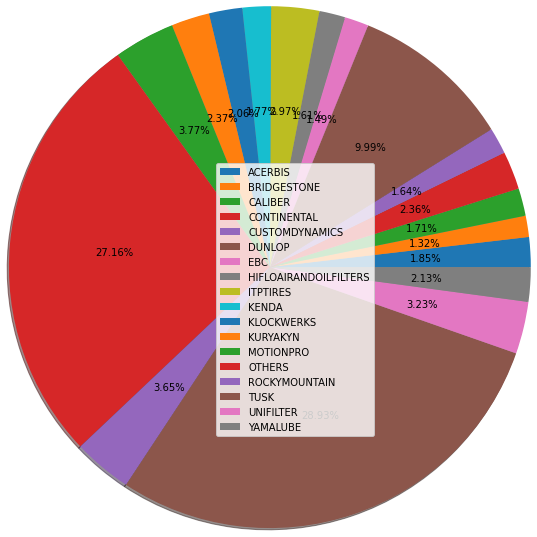

,brand_new,sum,count,percent %,mean $
0,TOTAL,157003.5163,19391,100.0,8.1
15,TUSK,45415.6,7061,28.9,6.4
13,OTHERS,42648.8968,5851,27.2,7.3
5,DUNLOP,15686.49,935,10.0,16.8
12,MOTIONPRO,5926.0395,1489,3.8,4.0
14,ROCKYMOUNTAIN,5731.82,304,3.7,18.9
16,UNIFILTER,5070.0,881,3.2,5.8
8,ITPTIRES,4657.86,231,3.0,20.2
11,KURYAKYN,3719.57,213,2.4,17.5
3,CONTINENTAL,3701.35,328,2.4,11.3


In [36]:
a = 2000


print("")
print("")
print("Brands by profit between ", date1, " and ", date2)


df = f['Gross Profit'].groupby(f['brand_id']).agg('sum').reset_index(name='sum')
z = (df.loc[df['sum'] <= a]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['brand_id', 'sum']
z['brand_id'] = z['brand_id'].replace(['sum'],'OTHERS')

df1 = (df.loc[df['sum'] >= a])

df_brands = df1.rename(columns={'brand_id': 'brand_new'})
del df_brands['sum']

df2= pd.merge(f, df_brands, left_on=["brand_id"], right_on=['brand_new'], how='left').drop_duplicates()
df2['brand_new'] = df2['brand_new'].fillna("OTHERS")

df3 = df2['Gross Profit'].groupby(df2['brand_new']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['brand_new']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["brand_new"], right_on=['brand_new'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['brand_new'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['brand_new'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1.sort_values('sum', ascending=False).round(1)



Brands by profit between  2020-12-31  and  2021-03-31


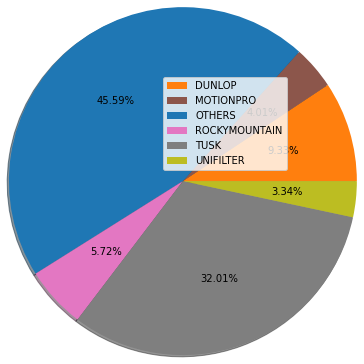



Brands by profit between  2021-03-31  and  2021-07-01


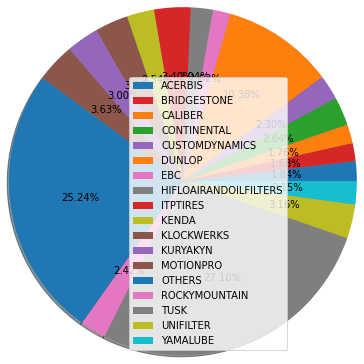



Dataframe brands by profit between  2020-12-31  and  2021-03-31


,brand_new,sum,count,percent %,mean $
0,TOTAL,58424.19,7744,100.0,7.5
2,OTHERS,26634.12,3143,45.6,8.5
4,TUSK,18699.87,3097,32.0,6.0
0,DUNLOP,5451.11,322,9.3,16.9
3,ROCKYMOUNTAIN,3343.52,196,5.7,17.1
1,MOTIONPRO,2344.0,587,4.0,4.0
5,UNIFILTER,1951.57,399,3.3,4.9




Dataframe brands by profit between  2021-03-31  and  2021-07-01


,brand_new,sum,count,percent %,mean $
0,TOTAL,98579.3263,11647,100.0,8.5
15,TUSK,26715.73,3964,27.1,6.7
13,OTHERS,24878.1568,3503,25.2,7.1
5,DUNLOP,10235.38,613,10.4,16.7
12,MOTIONPRO,3582.0395,902,3.6,4.0
8,ITPTIRES,3348.78,159,3.4,21.1
16,UNIFILTER,3118.43,482,3.2,6.5
10,KLOCKWERKS,3039.45,84,3.1,36.2
11,KURYAKYN,2958.36,166,3.0,17.8
3,CONTINENTAL,2605.22,236,2.6,11.0


In [50]:
a = 1500

date1 = "2020-12-31"
date2 = "2021-03-31"
date3 = "2021-07-01"

f1 = f[(f['purchase-date'] > date1) & (f['purchase-date'] <= date2)]
f2 = f[(f['purchase-date'] > date2) & (f['purchase-date'] < date3)]


colours = {'ACERBIS': 'C0',
           'CALIBER': 'C1',
           'CONTINENTAL': 'C2',
           'ITPTIRES': 'C3',
           'KURYAKYN': 'C4',           
           'MOTIONPRO': 'C5',
           'ROCKYMOUNTAIN': 'C6',           
           'TUSK': 'C7',
           'UNIFILTER': 'C8',           
           'YAMALUBE': 'C9',
           'OTHERS': 'C10',       
           'DUNLOP': 'C11',
           'BASSANIXHAUST': 'C12',
           'BRIDGESTONE': 'C13',
           'CUSTOMDYNAMICS': 'C14',
           'KLOCKWERKS': 'C15',
           'EBC': 'C16',
           'HIFLOAIRANDOILFILTERS': 'C17',
           'KENDA': 'C18'}

print("")
print("")
print("Brands by profit between ", date1, " and ", date2)


df = f1['Gross Profit'].groupby(f1['brand_id']).agg('sum').reset_index(name='sum')
z = (df.loc[df['sum'] <= a]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['brand_id', 'sum']
z['brand_id'] = z['brand_id'].replace(['sum'],'OTHERS')

df1 = (df.loc[df['sum'] >= a])

df_brands = df1.rename(columns={'brand_id': 'brand_new'})
del df_brands['sum']

df2= pd.merge(f1, df_brands, left_on=["brand_id"], right_on=['brand_new'], how='left').drop_duplicates()
df2['brand_new'] = df2['brand_new'].fillna("OTHERS")

df3 = df2['Gross Profit'].groupby(df2['brand_new']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['brand_new']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["brand_new"], right_on=['brand_new'], how='inner').drop_duplicates()


plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["brand_new"]])
plt.legend(p1['brand_new'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['brand_new'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p_first = p1.sort_values('sum', ascending=False).round(1)


print("")
print("")
print("Brands by profit between ", date2, " and ", date3)



df = f2['Gross Profit'].groupby(f2['brand_id']).agg('sum').reset_index(name='sum')
z = (df.loc[df['sum'] <= a]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['brand_id', 'sum']
z['brand_id'] = z['brand_id'].replace(['sum'],'OTHERS')

df1 = (df.loc[df['sum'] >= a])

df_brands = df1.rename(columns={'brand_id': 'brand_new'})
del df_brands['sum']

df2= pd.merge(f2, df_brands, left_on=["brand_id"], right_on=['brand_new'], how='left').drop_duplicates()
df2['brand_new'] = df2['brand_new'].fillna("OTHERS")

df3 = df2['Gross Profit'].groupby(df2['brand_new']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['brand_new']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["brand_new"], right_on=['brand_new'], how='inner').drop_duplicates()


plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["brand_new"]])
plt.legend(p1['brand_new'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['brand_new'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)



print("")
print("")
print("Dataframe brands by profit between ", date1, " and ", date2)
display(p_first)



print("")
print("")
p_second = p1.sort_values('sum', ascending=False).round(1)
print("Dataframe brands by profit between ", date2, " and ", date3)
display(p_second)



Suppliers by profit between  2020-12-31  and  2021-07-01


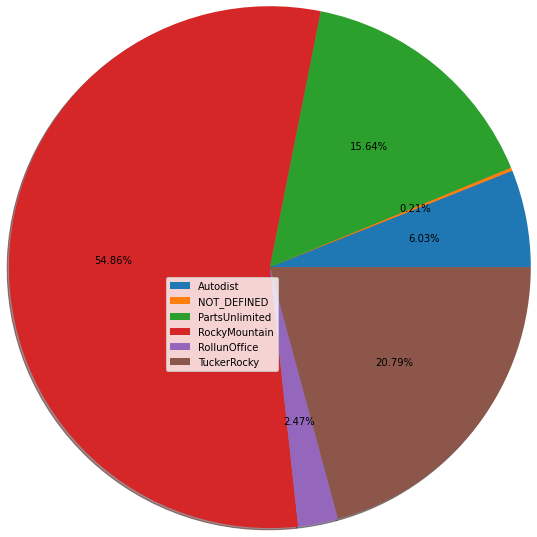

,Sr name,sum_profit,count,sum_revenue,percent %,profit/revenue %,mean $
0,TOTAL,157229.3263,19359,915119.62,100.0,17.2,8.1
3,RockyMountain,86249.27,11568,446369.44,54.9,19.3,7.5
5,TuckerRocky,32694.5663,2680,225677.79,20.8,14.5,12.2
2,PartsUnlimited,24598.45,2388,155987.44,15.6,15.8,10.3
0,Autodist,9475.65,1863,66806.34,6.0,14.2,5.1
4,RollunOffice,3887.61,833,19162.09,2.5,20.3,4.7
1,NOT_DEFINED,323.78,27,1116.52,0.2,29.0,12.0


In [51]:
date1 = "2020-12-31"
date2 = "2021-07-01"


print("")
print("")
print("Suppliers by profit between ", date1, " and ", date2)

l = (f.loc[(f['Sr name'] != "RockyMountainRetail")&(f['Sr name'] != "Wps")&(f['Sr name'] != "other")])

df2 = l.copy()
df2['Sr name'] = df2['Sr name'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum_profit')
df4 = df2['Gross Profit'].groupby(df2['Sr name']).agg('count').reset_index(name='count')
df5 = df2['item-price'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum_revenue')
p1 = pd.merge(df3, df4, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()
p1 = pd.merge(p1, df5, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()

plt.pie(p1['sum_profit'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['Sr name'], loc="best")
plt.show()

p1['percent %'] = (p1['sum_profit'] / p1['sum_profit'].sum()) * 100
p1['profit/revenue  %'] = (p1['sum_profit'] / p1['sum_revenue']) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Sr name'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum_profit']/p1['count']
p1['profit/revenue  %'] = (p1['sum_profit'] / p1['sum_revenue']) * 100

p1[["mean $", 'percent %', 'profit/revenue  %']] = p1[["mean $", 'percent %', 'profit/revenue  %']].astype(float).round(1)
p1.sort_values('sum_profit', ascending=False).round(1)



Suppliers by profit between  2020-12-31  and  2021-03-31


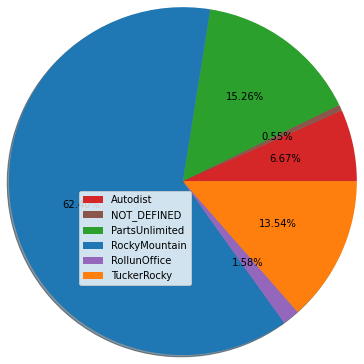

Suppliers by profit between  2021-03-31  and  2021-07-01


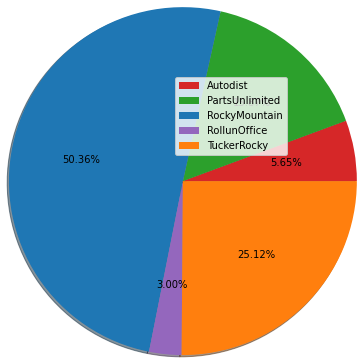



Dataframe Suppliers by profit between  2020-12-31  and  2021-03-31


,Sr name,sum_profit,count,sum_revenue,percent %,mean $,profit/revenue %
0,TOTAL,58728.38,7730,344093.03,100.0,7.6,17.1
3,RockyMountain,36646.16,5046,198662.26,62.4,7.3,18.4
2,PartsUnlimited,8962.16,910,54245.05,15.3,9.8,16.5
5,TuckerRocky,7952.52,705,53305.65,13.5,11.3,14.9
0,Autodist,3915.24,750,30289.16,6.7,5.2,12.9
4,RollunOffice,928.52,292,6474.39,1.6,3.2,14.3
1,NOT_DEFINED,323.78,27,1116.52,0.6,12.0,29.0




Dataframe Suppliers by profit between  2021-03-31  and  2021-07-01


,Sr name,sum_profit,count,sum_revenue,percent %,mean $,profit/revenue %
0,TOTAL,98500.9463,11629,571026.59,100.0,8.5,17.2
2,RockyMountain,49603.11,6522,247707.18,50.4,7.6,20.0
4,TuckerRocky,24742.0463,1975,172372.14,25.1,12.5,14.4
1,PartsUnlimited,15636.29,1478,101742.39,15.9,10.6,15.4
0,Autodist,5560.41,1113,36517.18,5.6,5.0,15.2
3,RollunOffice,2959.09,541,12687.7,3.0,5.5,23.3


In [52]:
date1 = "2020-12-31"
date2 = "2021-03-31"
date3 = "2021-07-01"

f1 = f[(f['purchase-date'] > date1) & (f['purchase-date'] <= date2)]
f2 = f[(f['purchase-date'] > date2) & (f['purchase-date'] < date3)]


colours = {'RockyMountain': 'C0',
           'TuckerRocky': 'C1',
           'PartsUnlimited': 'C2',
           'Autodist': 'C3',
           'RollunOffice': 'C4',           
           'NOT_DEFINED': 'C5'}



print("")
print("")
print("Suppliers by profit between ", date1, " and ", date2)

l = (f1.loc[(f1['Sr name'] != "RockyMountainRetail")&(f1['Sr name'] != "Wps")&(f1['Sr name'] != "other")])

df2 = l.copy()
df2['Sr name'] = df2['Sr name'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum_profit')
df4 = df2['Gross Profit'].groupby(df2['Sr name']).agg('count').reset_index(name='count')
df5 = df2['item-price'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum_revenue')
p1 = pd.merge(df3, df4, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()
p1 = pd.merge(p1, df5, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()

plt.pie(p1['sum_profit'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["Sr name"]])
plt.legend(p1['Sr name'], loc="best")
plt.show()

p1['percent %'] = (p1['sum_profit'] / p1['sum_profit'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Sr name'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum_profit']/p1['count']
p1['profit/revenue  %'] = (p1['sum_profit'] / p1['sum_revenue']) * 100

p1[["mean $", 'percent %', 'profit/revenue  %']] = p1[["mean $", 'percent %', 'profit/revenue  %']].astype(float).round(1)
p_first = p1.sort_values('sum_profit', ascending=False).round(1)



print("Suppliers by profit between ", date2, " and ", date3)

l = (f2.loc[(f2['Sr name'] != "RockyMountainRetail")&(f2['Sr name'] != "Wps")&(f2['Sr name'] != "other")])

df2 = l.copy()
df2['Sr name'] = df2['Sr name'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum_profit')
df4 = df2['Gross Profit'].groupby(df2['Sr name']).agg('count').reset_index(name='count')
df5 = df2['item-price'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum_revenue')
p1 = pd.merge(df3, df4, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()
p1 = pd.merge(p1, df5, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()

plt.pie(p1['sum_profit'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["Sr name"]])
plt.legend(p1['Sr name'], loc="best")
plt.show()

p1['percent %'] = (p1['sum_profit'] / p1['sum_profit'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Sr name'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum_profit']/p1['count']
p1['profit/revenue  %'] = (p1['sum_profit'] / p1['sum_revenue']) * 100

p1[["mean $", 'percent %', 'profit/revenue  %']] = p1[["mean $", 'percent %', 'profit/revenue  %']].astype(float).round(1)
p_second = p1.sort_values('sum_profit', ascending=False).round(1)




print("")
print("")
print("Dataframe Suppliers by profit between ", date1, " and ", date2)
display(p_first)



print("")
print("")
p_second = p1.sort_values('sum_profit', ascending=False).round(1)
print("Dataframe Suppliers by profit between ", date2, " and ", date3)
display(p_second)



Dropship/pickup by profit between  2020-12-31  and  2021-07-01


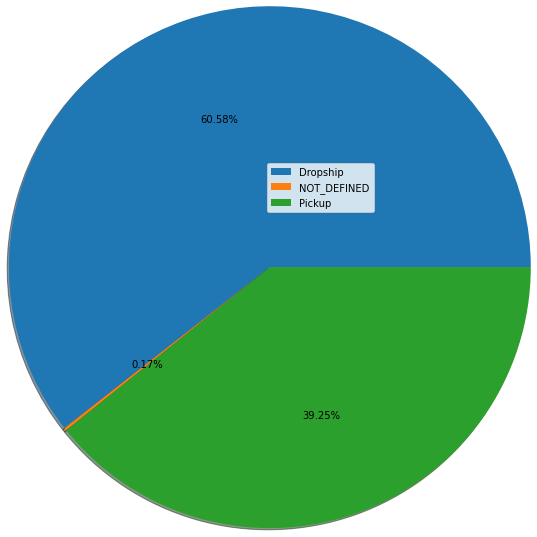

,is_dropship,sum,count,percent %,mean $
0,TOTAL,157003.5163,19391,100.0,8.1
0,Dropship,95111.85,7364,60.6,12.9
2,Pickup,61628.9963,12006,39.3,5.1
1,NOT_DEFINED,262.67,21,0.2,12.5


In [53]:
date1 = "2020-12-31"
date2 = "2021-07-01"


print("")
print("")
print("Dropship/pickup by profit between ", date1, " and ", date2)

df2 = f.copy()
df2['is_dropship'] = df2['is_dropship'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['is_dropship']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['is_dropship']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["is_dropship"], right_on=['is_dropship'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['is_dropship'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['is_dropship'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1.sort_values('sum', ascending=False).round(1)



Profit by groups. Groups defined by value of the item-price between  2020-12-31  and  2021-07-01


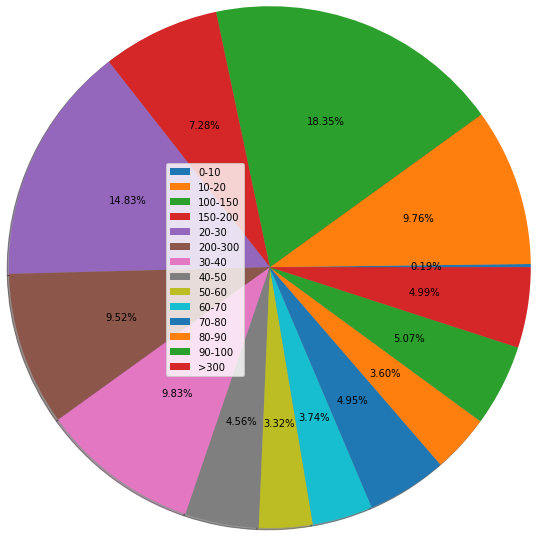

,Item-price,profit sum,count,percent profit %,mean profit $
0,TOTAL,157003.5163,19391,100.0,8.1
2,100-150,28808.68,1369,18.3,21.0
4,20-30,23281.5725,5688,14.8,4.1
6,30-40,15429.7715,2582,9.8,6.0
1,10-20,15331.1748,5209,9.8,2.9
5,200-300,14947.26,412,9.5,36.3
3,150-200,11428.32,414,7.3,27.6
12,90-100,7957.07,537,5.1,14.8
13,>300,7832.31,108,5.0,72.5
10,70-80,7779.1125,652,5.0,11.9


In [54]:
print("")
print("")
print("Profit by groups. Groups defined by value of the item-price between ", date1, " and ", date2)

f.loc[f['item-price'] <= 10, 'Item-price'] = "0-10"
f.loc[(f['item-price'] > 10)&(f['item-price'] <= 20) , 'Item-price'] = "10-20"
f.loc[(f['item-price'] > 20)&(f['item-price'] <= 30), 'Item-price'] = "20-30"
f.loc[(f['item-price'] > 30)&(f['item-price'] <= 40) , 'Item-price'] = "30-40"
f.loc[(f['item-price'] > 40)&(f['item-price'] <= 50), 'Item-price'] = "40-50"
f.loc[(f['item-price'] > 50)&(f['item-price'] <= 60) , 'Item-price'] = "50-60"
f.loc[(f['item-price'] > 60)&(f['item-price'] <= 70), 'Item-price'] = "60-70"
f.loc[(f['item-price'] > 70)&(f['item-price'] <= 80) , 'Item-price'] = "70-80"
f.loc[(f['item-price'] > 80)&(f['item-price'] <= 90), 'Item-price'] = "80-90"
f.loc[(f['item-price'] > 90)&(f['item-price'] <= 100), 'Item-price'] = "90-100"
f.loc[(f['item-price'] > 100)&(f['item-price'] <= 150) , 'Item-price'] = "100-150"
f.loc[(f['item-price'] > 150)&(f['item-price'] <= 200), 'Item-price'] = "150-200"
f.loc[(f['item-price'] > 200)&(f['item-price'] <= 300), 'Item-price'] = "200-300"
f.loc[(f['item-price'] > 300), 'Item-price'] = ">300"


df3 = f['Gross Profit'].groupby(f['Item-price']).agg('sum').reset_index(name='profit sum')
df4 = f['Gross Profit'].groupby(f['Item-price']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["Item-price"], right_on=['Item-price'], how='inner').drop_duplicates()

plt.pie(p1['profit sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['Item-price'], loc="best")
plt.show()

p1['percent profit %'] = (p1['profit sum'] / p1['profit sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Item-price'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean profit $"] = p1['profit sum']/p1['count']

p1[["mean profit $", 'percent profit %']] = p1[["mean profit $", 'percent profit %']].astype(float).round(1)
p1.sort_values('profit sum', ascending=False).round(1)



Profit by groups. Groups defined by value of the item-price between  2020-12-31  and  2021-07-01


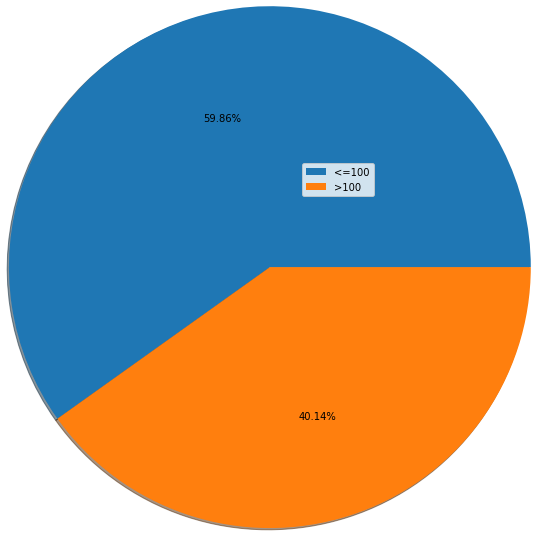

,Item-price,profit sum,count,percent profit %,mean profit $
0,TOTAL,157003.5163,19391,100.0,8.1
1,>100,63016.57,2303,40.1,27.4
0,<=100,93986.9463,17088,59.9,5.5


In [55]:
print("")
print("")
print("Profit by groups. Groups defined by value of the item-price between ", date1, " and ", date2)

f.loc[f['item-price'] <= 100, 'Item-price'] = "<=100"
f.loc[(f['item-price'] > 100), 'Item-price'] = ">100"


df3 = f['Gross Profit'].groupby(f['Item-price']).agg('sum').reset_index(name='profit sum')
df4 = f['Gross Profit'].groupby(f['Item-price']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["Item-price"], right_on=['Item-price'], how='inner').drop_duplicates()

plt.pie(p1['profit sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['Item-price'], loc="best")
plt.show()

p1['percent profit %'] = (p1['profit sum'] / p1['profit sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Item-price'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean profit $"] = p1['profit sum']/p1['count']

p1[["mean profit $", 'percent profit %']] = p1[["mean profit $", 'percent profit %']].astype(float).round(1)
p1.sort_values('Item-price', ascending=False).round(1)



Distribution by products which generate 100 % of profit. Number of products:  2438  Date Between  2020-12-31  and  2021-07-01


<AxesSubplot:>

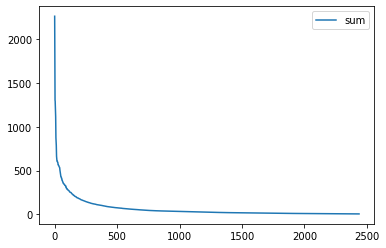

In [56]:
persent = 1

df5 = f['Gross Profit'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df6 = f['Gross Profit'].groupby(f['asin']).agg('count').reset_index(name='count')
df = pd.merge(df5, df6, left_on=["asin"], right_on=['asin'], how='inner').drop_duplicates()
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']


df1 = pd.DataFrame({'asin': [], 'sum': []})
b = df["sum"].sum()*persent
a = 0
for index, row in df.iterrows():
    
    if a < b:
        df1 = df1.append(row, ignore_index=True)
        a = a + row['sum']   

        
        
print("")
print("")      
print("Distribution by products which generate", persent*100, "% of profit. Number of products: ", df1["asin"].count(),  " Date Between ", date1, " and ", date2)        
df1.plot(y='sum')      



Profit by products. 209 products generate 50.0 % of profit. Date Between  2020-12-31  and  2021-07-01


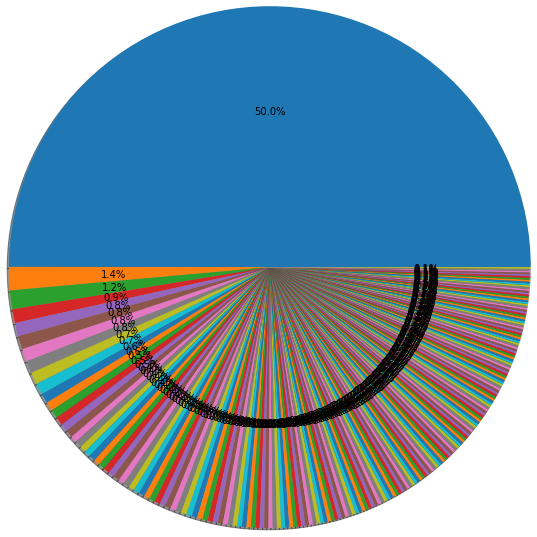

,asin,count,sum,percent %,mean $
0,TOTAL,10538,157003.5163,100.0,14.9
1,OTHERS,3018,78478.3363,50.0,26.0
2,B00YNTVRK6,71,2260.34,1.4,31.8
3,B00T6J9F16,42,1823.89,1.2,43.4
4,B008QS9NEW,245,1336.1,0.9,5.5
5,B07MKPR3Y5,269,1301.26,0.8,4.8
6,B06XC756LG,39,1293.22,0.8,33.2
7,B000WJL65W,40,1237.68,0.8,30.9
8,B000GZKFD6,60,1190.57,0.8,19.8
9,B005J92G86,122,1166.8,0.7,9.6


In [57]:
persent = 0.5




df5 = f['Gross Profit'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df6 = f['Gross Profit'].groupby(f['asin']).agg('count').reset_index(name='count')
df = pd.merge(df5, df6, left_on=["asin"], right_on=['asin'], how='inner').drop_duplicates()
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']


df1 = pd.DataFrame({'asin': [], 'sum': []})
b = df["sum"].sum()*persent
a = 0
for index, row in df.iterrows():
    
    if a < b:
        df1 = df1.append(row, ignore_index=True)
        a = a + row['sum']      
        
df1['group'] = 'A'  

df2= pd.merge(df, df1, left_on=["asin"], right_on=['asin'], how='left').drop_duplicates()
df2['group'] = df2['group'].fillna("B")
del df2['sum_y']
df2.rename(columns={'sum_x': 'sum'}, inplace=True)
del df2['count_y']
df2.rename(columns={'count_x': 'count'}, inplace=True)

o = (df2.loc[df2['group'] == "B"]).agg('count').reset_index(name='count').iloc[1:]
o.columns = ['asin', 'count']
o['asin'] = o['asin'].replace(['count'],'OTHERS')
o = (o.loc[o['asin'] == "OTHERS"])

z = (df2.loc[df2['group'] == "B"]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['asin', 'sum']
z['asin'] = z['asin'].replace(['sum'],'OTHERS')
z = z.loc[z['asin'] == "OTHERS"]

x = pd.merge(o, z, left_on=["asin"], right_on=['asin'], how='left').drop_duplicates()

df3 = (df2.loc[df2['group'] == "A"])
df4 = df3[["asin","sum","count"]]

frames1 = [x, df4]
p1 = pd.concat(frames1)

print("")
print("")
print("Profit by products.", p1["asin"].count(), "products generate", persent*100, "% of profit.", "Date Between ", date1, " and ", date2)

plt.pie(p1['sum'], autopct='%1.1f%%',shadow=True, radius=3)
#plt.legend(p1['asin'], loc="best")
plt.show()


p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['asin'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1 = p1.sort_values('sum', ascending=False).round(1).reset_index()
del p1['index']
p1



Profit by product types. 16 product types 90.0 % of profit


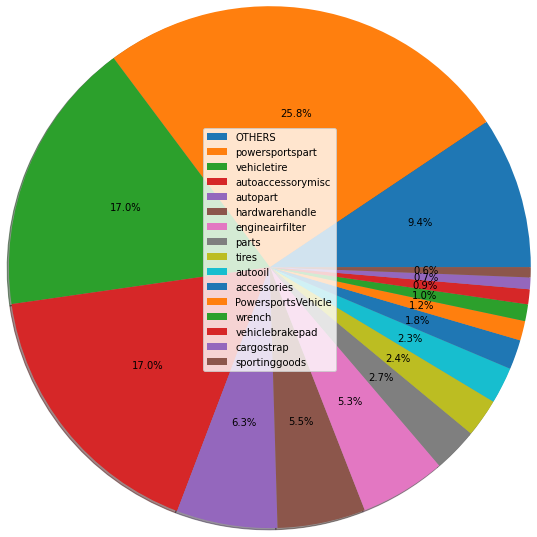

,Product Type,count,sum,percent %,mean $
0,TOTAL,17175,152010.9063,100.0,8.9
1,powersportspart,5093,39236.904,25.8,7.7
2,vehicletire,1629,25913.51,17.0,15.9
3,autoaccessorymisc,3466,25766.545,17.0,7.4
4,OTHERS,83,14296.9968,9.4,172.3
5,autopart,1191,9509.9,6.3,8.0
6,hardwarehandle,1929,8290.41,5.5,4.3
7,engineairfilter,1268,8093.59,5.3,6.4
8,parts,513,4177.79,2.7,8.1
9,tires,222,3617.7,2.4,16.3


In [58]:
persent = 0.9

df5 = f['Gross Profit'].groupby(f['Product Type']).agg('sum').reset_index(name='sum')
df6 = f['Gross Profit'].groupby(f['Product Type']).agg('count').reset_index(name='count')
df = pd.merge(df5, df6, left_on=["Product Type"], right_on=['Product Type'], how='inner').drop_duplicates()
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']


df1 = pd.DataFrame({'Product Type': [], 'sum': []})
b = df["sum"].sum()*persent
a = 0
for index, row in df.iterrows():
    
    if a < b:
        df1 = df1.append(row, ignore_index=True)
        a = a + row['sum']      
        
df1['group'] = 'A'  

df2= pd.merge(df, df1, left_on=["Product Type"], right_on=['Product Type'], how='left').drop_duplicates()
df2['group'] = df2['group'].fillna("B")
del df2['sum_y']
df2.rename(columns={'sum_x': 'sum'}, inplace=True)
del df2['count_y']
df2.rename(columns={'count_x': 'count'}, inplace=True)

o = (df2.loc[df2['group'] == "B"]).agg('count').reset_index(name='count').iloc[1:]
o.columns = ['Product Type', 'count']
o['Product Type'] = o['Product Type'].replace(['count'],'OTHERS')
o = (o.loc[o['Product Type'] == "OTHERS"])

z = (df2.loc[df2['group'] == "B"]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['Product Type', 'sum']
z['Product Type'] = z['Product Type'].replace(['sum'],'OTHERS')
z = z.loc[z['Product Type'] == "OTHERS"]

x = pd.merge(o, z, left_on=["Product Type"], right_on=['Product Type'], how='left').drop_duplicates()

df3 = (df2.loc[df2['group'] == "A"])
df4 = df3[["Product Type","sum","count"]]

frames1 = [x, df4]
p1 = pd.concat(frames1)

print("")
print("")
print("Profit by product types.", p1["Product Type"].count(), "product types", persent*100, "% of profit")

plt.pie(p1['sum'], autopct='%1.1f%%',shadow=True, radius=3)
plt.legend(p1['Product Type'], loc="lower center")
plt.show()


p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Product Type'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1 = p1.sort_values('sum', ascending=False).round(1).reset_index()
del p1['index']
p1



Map used by profit


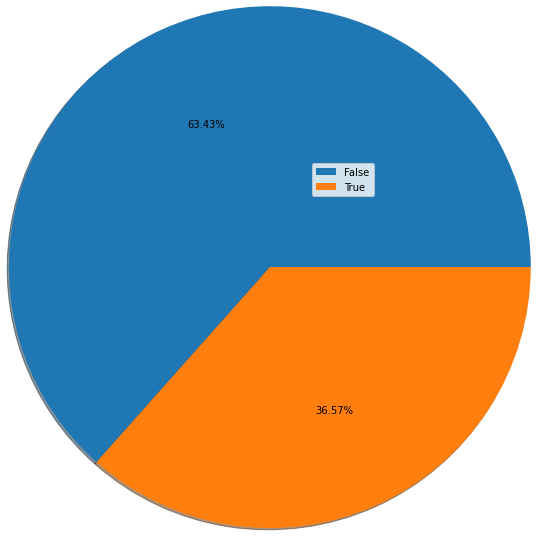

,map_used,sum,count,percent %,mean $
0,TOTAL,155206.9863,19168.0,100.0,8.1
0,False,98453.8468,13896,63.4,7.1
1,True,56753.1395,5272,36.6,10.8


In [59]:
print("")
print("")
print("Map used by profit")


df3 = f['Gross Profit'].groupby(f['map_used']).agg('sum').reset_index(name='sum')
df4 = f['Gross Profit'].groupby(f['map_used']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["map_used"], right_on=['map_used'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['map_used'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['map_used'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1.sort_values('sum', ascending=False).round(1)

In [60]:
date1 = "2019-12-31"
date2 = "2020-06-31"

sales_df_2020_first_half = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\Az.xlsx')
sales_df_2020_first_half = sales_df_2020_first_half[(sales_df_2020_first_half["order-status"] != 'Cancelled') & (sales_df_2020_first_half["fulfillment-channel"] != 'Amazon')]
sales_df_2020_first_half = sales_df_2020_first_half[["asin", "amazon-order-id","ship-state","sku","item-price", "purchase-date"]]
sales_df_2020_first_half = sales_df_2020_first_half[(sales_df_2020_first_half['purchase-date'] > date1) & (sales_df_2020_first_half['purchase-date'] < date2)]

df = sales_df_2020_first_half['item-price'].groupby(sales_df_2020_first_half['asin']).agg('sum').reset_index(name='sum')
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']
df =  df.head(200)

In [61]:
df1 = f['item-price'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df1 = df1.sort_values(by=['sum'], ascending=False).reset_index()
del df1['index']
df1 =  df1.head(200)

In [62]:
df1 = f['item-price'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df1 = df1.sort_values(by=['sum'], ascending=False).reset_index()
del df1['index']
df1 =  df1.head(200)

In [63]:
p = pd.merge(df, df1, left_on=["asin"], right_on=['asin'], how='inner').drop_duplicates()

In [64]:
p.columns = ['asin', 'sum_item_price_2020', 'sum_item_price_2021']

In [65]:
print("")
print("")
print("Products which are in the TOP200 in both time periods: Jan-June 2020 and Jan-June 2021")

p



Products which are in the TOP200 in both time periods: Jan-June 2020 and Jan-June 2021


,asin,sum_item_price_2020,sum_item_price_2021
0,B00BG07IO4,4294.59,2868.12
1,B00631E14Q,3460.27,960.85
2,B004E27O3G,3425.66,2773.16
3,B003O72GD0,3321.22,1843.60
4,B011AO22Z0,3096.45,3915.12
5,B00RNI4SUA,3013.60,3470.40
6,B01IE4JHXO,2851.74,1619.68
7,B01N9Z1OV0,2848.21,1366.86
8,B01N3Y7E48,2580.94,1668.90
9,B00PTVUMPI,2539.88,2665.69
